In [86]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [87]:
import numpy as np

# 다운로드된 파일 경로
download_path = "C:/program1/class/imdb.npz"

# IMDb 데이터 로드
with np.load(download_path, allow_pickle=True) as data:
    X_train = data['x_train']
    y_train = data['y_train']
    X_test = data['x_test']
    y_test = data['y_test']

print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

# 필요한 추가 전처리 작업을 여기에 추가
# 예: 토큰화, 패딩 등


훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [88]:
print('첫번째 훈련용 리뷰 :',X_train[0])
print('첫번째 훈련용 리뷰의 레이블 :',y_train[0])

첫번째 훈련용 리뷰 : [23022, 309, 6, 3, 1069, 209, 9, 2175, 30, 1, 169, 55, 14, 46, 82, 5869, 41, 393, 110, 138, 14, 5359, 58, 4477, 150, 8, 1, 5032, 5948, 482, 69, 5, 261, 12, 23022, 73935, 2003, 6, 73, 2436, 5, 632, 71, 6, 5359, 1, 25279, 5, 2004, 10471, 1, 5941, 1534, 34, 67, 64, 205, 140, 65, 1232, 63526, 21145, 1, 49265, 4, 1, 223, 901, 29, 3024, 69, 4, 1, 5863, 10, 694, 2, 65, 1534, 51, 10, 216, 1, 387, 8, 60, 3, 1472, 3724, 802, 5, 3521, 177, 1, 393, 10, 1238, 14030, 30, 309, 3, 353, 344, 2989, 143, 130, 5, 7804, 28, 4, 126, 5359, 1472, 2375, 5, 23022, 309, 10, 532, 12, 108, 1470, 4, 58, 556, 101, 12, 23022, 309, 6, 227, 4187, 48, 3, 2237, 12, 9, 215]
첫번째 훈련용 리뷰의 레이블 : 1


리뷰의 최대 길이 : 2493
리뷰의 평균 길이 : 237.71364


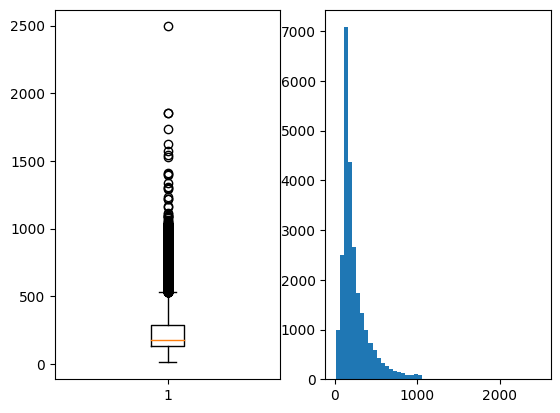

In [89]:
reviews_length = [len(review) for review in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(reviews_length, bins=50)
plt.show()

In [90]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [91]:
import json
import os

# 다운로드된 파일 경로
download_path = "C:/program1/class/imdb_word_index.json"

# 파일 경로가 존재하는지 확인
if not os.path.exists(download_path):
    raise FileNotFoundError(f"{download_path} 파일을 찾을 수 없습니다. JSON 파일이 올바르게 다운로드되고 경로가 정확한지 확인하십시오.")

# IMDb 단어 인덱스 로드
with open(download_path, 'r', encoding='utf-8') as file:
    word_to_index = json.load(file)

# 인덱스-단어 맵핑 생성
index_to_word = {value+3: key for key, value in word_to_index.items()}

# 특별 토큰 추가
index_to_word[0] = '<PAD>'
index_to_word[1] = '<START>'
index_to_word[2] = '<UNK>'
index_to_word[3] = '<UNUSED>'

# 확인용 출력
print("단어 인덱스의 일부:")
for i in range(10):
    print(f"{i}: {index_to_word[i]}")

단어 인덱스의 일부:
0: <PAD>
1: <START>
2: <UNK>
3: <UNUSED>
4: the
5: and
6: a
7: of
8: to
9: is


In [92]:
print('빈도수 상위 1등 단어 : {}'.format(index_to_word[4]))

빈도수 상위 1등 단어 : the


In [93]:
print('빈도수 상위 3938등 단어 : {}'.format(index_to_word[3941]))

빈도수 상위 3938등 단어 : suited


In [94]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_train[0]]))

unapologetic himself a <UNUSED> considering without is luke be <sos> find very this out also newman her face seen why this moreover time dub now to <sos> unpredictable sorely guess had and although it unapologetic classed'' behavior a well source and hero were a moreover <sos> periodic and captured capshaw <sos> 1950 proves by see only own go story likes clubfoot columbus <sos> excerpted the <sos> family write he mob had the <sos> lasting br knows <unk> story proves what br come <sos> let to even <UNUSED> trailer progress editing and pleased cast <sos> face br surprisingly speakeasy be himself <UNUSED> try home topic through end and boo have the ever moreover trailer relatively and unapologetic himself br self it films include the time killed any it unapologetic himself a bit goodness if <UNUSED> assume it is must


In [95]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
# IMDb 데이터 파일 경로
download_path = "C:/program1/class/imdb.npz"

# IMDb 데이터 로드
with np.load(download_path, allow_pickle=True) as data:
    X_train = data['x_train']
    y_train = data['y_train']
    X_test = data['x_test']
    y_test = data['y_test']
vocab_size = 10000
max_len = 500


X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [96]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=1, callbacks=[es, mc], batch_size=64, validation_split=0.2)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/embedding_2/embedding_lookup' defined at (most recent call last):
    File "C:\Users\User\.anaconda\envs\deep\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "C:\Users\User\.anaconda\envs\deep\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\User\.anaconda\envs\deep\lib\asyncio\base_events.py", line 541, in run_forever
      self._run_once()
    File "C:\Users\User\.anaconda\envs\deep\lib\asyncio\base_events.py", line 1786, in _run_once
      handle._run()
    File "C:\Users\User\.anaconda\envs\deep\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\ipykernel\ipkernel.py", line 387, in do_execute
      cell_id=cell_id,
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\IPython\core\interactiveshell.py", line 2976, in run_cell
      raw_cell, store_history, silent, shell_futures, cell_id
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\IPython\core\interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\IPython\core\interactiveshell.py", line 3258, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\IPython\core\interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\User\AppData\Local\Temp\ipykernel_21216\1672396998.py", line 13, in <module>
      history = model.fit(X_train, y_train, epochs=1, callbacks=[es, mc], batch_size=64, validation_split=0.2)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\engine\training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\User\.anaconda\envs\deep\lib\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_2/embedding_2/embedding_lookup'
indices[47,335] = 10585 is not in [0, 10000)
	 [[{{node sequential_2/embedding_2/embedding_lookup}}]] [Op:__inference_train_function_9928]

In [ ]:
loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

In [ ]:
def sentiment_predict(new_sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
  encoded = []

  # 띄어쓰기 단위 토큰화 후 정수 인코딩
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = pad_sequences([encoded], maxlen=max_len)
  score = float(loaded_model.predict(pad_sequence)) # 예측

  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

In [ ]:
test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)